# Traveling sales'man problem

## Lab1 
- Rozwiazanie pokolei
- Zachlanne zawsze do najblizszego
- Losowo

Rozplatywanie rozwiazania jesli 4 weirzcholki sie przecinaja to jest to udowodnione ze jest to nieoptymalne i trzeba zamienic kolejnosc

Wizualizacja wierzcholki i polaczenia w formie graficznej

tsp lib / ckroA

In [253]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import random
import math

In [254]:
def load_file(filename):
    with open(filename, 'r') as file:
        data = []
        found_section = False
        for line in file:
            line = line.strip()
            if not found_section:
                if line == "NODE_COORD_SECTION":
                    found_section = True
            else:
                if line == "EOF":
                    break
                parts = line.split()
                if len(parts) == 3:
                    data.append((int(parts[0]), float(parts[1]), float(parts[2])))
        return data

print(load_file("burma14.tsp"))


[(1, 16.47, 96.1), (2, 16.47, 94.44), (3, 20.09, 92.54), (4, 22.39, 93.37), (5, 25.23, 97.24), (6, 22.0, 96.05), (7, 20.47, 97.02), (8, 17.2, 96.29), (9, 16.3, 97.38), (10, 14.05, 98.12), (11, 16.53, 97.38), (12, 21.52, 95.59), (13, 19.41, 97.13), (14, 20.09, 94.55)]


In [255]:
def calculate_total_distance(path):
    total = 0
    for i in range(len(path)):
        x1, y1 = path[i][1], path[i][2]
        x2, y2 = path[(i+1) % len(path)][1], path[(i+1) % len(path)][2]
        total += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return total

def calculate_distance(a, b):
    return math.hypot(a[1] - b[1], a[2] - b[2])

In [256]:
def calculate_distance_random(data):
    random.shuffle(data)
    distance = 0
    order = []
    order.append(data[0])

    for i in range(len(data)):
        if i == 0:
            continue
        dist = ((data[i][1] - order[i-1][1]) ** 2 + (data[i][2] - order[i-1][2]) ** 2) ** 0.5
        order.append(data[i])
        distance += dist
    distance += ((data[0][1] - order[-1][1]) ** 2 + (data[0][2] - order[-1][2]) ** 2) ** 0.5
    return distance, order
print(calculate_distance_random(load_file("burma14.tsp")))

(65.78307447835209, [(3, 20.09, 92.54), (2, 16.47, 94.44), (7, 20.47, 97.02), (11, 16.53, 97.38), (13, 19.41, 97.13), (14, 20.09, 94.55), (4, 22.39, 93.37), (8, 17.2, 96.29), (6, 22.0, 96.05), (10, 14.05, 98.12), (9, 16.3, 97.38), (12, 21.52, 95.59), (5, 25.23, 97.24), (1, 16.47, 96.1)])


In [ ]:
def dismantle_crossings(order, total_distance):
    improved = True
    improvements = 0
    improved_order = order[:]

    while improved:
        improved = False
        for i in range(len(improved_order) - 1):
            for j in range(i + 2, len(improved_order)):
                if j == len(improved_order) - 1 and i == 0:
                    continue 

                a, b = improved_order[i], improved_order[i + 1]
                c, d = improved_order[j], improved_order[(j + 1) % len(improved_order)]

                old_dist = calculate_distance(a, b) + calculate_distance(c, d)
                new_dist = calculate_distance(a, c) + calculate_distance(b, d)

                if new_dist < old_dist:
                    improved_order[i + 1: j + 1] = reversed(improved_order[i + 1: j + 1])
                    total_distance = total_distance - old_dist + new_dist
                    improved = True
                    improvements += 1
                    break
            if improved:
                break

    return improved_order, total_distance, improvements

In [258]:
def calculate_distance_greedy(data):
    current_city_idx = 0
    unvisited = list(range(len(data)))
    unvisited.remove(current_city_idx)
    
    order = [data[current_city_idx]]
    total_distance = 0
    
    while unvisited:
        min_dist = float('inf')
        next_city_idx = -1
        
        for j in unvisited:
            dist = ((data[j][1] - data[current_city_idx][1])**2 + (data[j][2] - data[current_city_idx][2])**2)**0.5
            if dist < min_dist:
                min_dist = dist
                next_city_idx = j
        
        current_city_idx = next_city_idx
        unvisited.remove(current_city_idx)
        order.append(data[current_city_idx])
        total_distance += min_dist
    while True:
        improved_order, improved_distance, _ = dismantle_crossings(order, total_distance)
        if total_distance > improved_distance:
            total_distance = improved_distance
            order = improved_order
        else:
            break
    return total_distance, order
print(calculate_distance_greedy(load_file("burma14.tsp")))

(22.374899556534626, [(1, 16.47, 96.1), (10, 14.05, 98.12), (9, 16.3, 97.38), (11, 16.53, 97.38), (13, 19.41, 97.13), (7, 20.47, 97.02), (12, 21.52, 95.59), (6, 22.0, 96.05), (5, 25.23, 97.24), (4, 22.39, 93.37), (3, 20.09, 92.54), (14, 20.09, 94.55), (2, 16.47, 94.44), (8, 17.2, 96.29)])


In [259]:
saTempStart=10000;    # temperatura Startowa
saTempAlpha=0.976;    # wspĂłĹczynnik zmiany temperatury

def calculate_distance_annealing(data):
    current_path = data.copy()
    random.shuffle(current_path)
    best_path = current_path.copy()
    best_distance = calculate_total_distance(best_path)
    
    temperature = saTempStart
    iterations = 400
    
    for _ in range(iterations):
        current_path, best_path, best_distance = sa_step(current_path, best_path, best_distance, temperature)
        temperature *= saTempAlpha
    
    return best_distance, best_path


def sa_step(current_path, best_path, best_distance, temperature):
    current_distance = calculate_total_distance(current_path)

    for _ in range(100):
        a, b = sorted(random.sample(range(len(current_path)), 2))
        new_path = current_path[:a] + list(reversed(current_path[a:b+1])) + current_path[b+1:]
        new_distance = calculate_total_distance(new_path)

        if new_distance < current_distance:
            current_path = new_path
            current_distance = new_distance
        else:
            prob = math.exp((current_distance - new_distance) / temperature)
            if random.random() < prob:
                current_path = new_path
                current_distance = new_distance

        if new_distance < best_distance:
            best_distance = new_distance
            best_path = new_path

    return current_path, best_path, best_distance

print(calculate_distance_annealing(load_file("burma14.tsp")))

(31.453620201330807, [(8, 17.2, 96.29), (11, 16.53, 97.38), (9, 16.3, 97.38), (10, 14.05, 98.12), (1, 16.47, 96.1), (2, 16.47, 94.44), (14, 20.09, 94.55), (3, 20.09, 92.54), (4, 22.39, 93.37), (12, 21.52, 95.59), (6, 22.0, 96.05), (5, 25.23, 97.24), (7, 20.47, 97.02), (13, 19.41, 97.13)])


In [ ]:
import os
import time

def benchmark_algorithms(directory):
    results = []

    for filename in os.listdir(directory):
        if filename.endswith('.tsp'):
            filepath = os.path.join(directory, filename)
            try:
                data = load_file(filepath)
                print(f"Benchmarking {filename}...")

                # Zachłanny
                start = time.time()
                greedy_dist, _ = calculate_distance_greedy(data.copy())
                greedy_time = time.time() - start

                # Wyżarzanie
                start = time.time()
                anneal_dist, _ = calculate_distance_annealing(data.copy())
                anneal_time = time.time() - start

                results.append({
                    "file": filename,
                    "greedy_dist": round(greedy_dist, 2),
                    "greedy_time": round(greedy_time, 3),
                    "anneal_dist": round(anneal_dist, 2),
                    "anneal_time": round(anneal_time, 3)
                })

            except Exception as e:
                print(f"Błąd przy przetwarzaniu {filename}: {e}")

    print("\n--- Wyniki benchmarku ---")
    print(f"{'Plik':<20} {'GreedyDist':<12} {'GreedyTime':<6} {'AnnealDist':<12} {'AnnealTime':<6}")
    for r in results:
        print(f"{r['file']:<20} {r['greedy_dist']:<12} {r['greedy_time']:<6} {r['anneal_dist']:<12} {r['anneal_time']:<6}")

benchmark_algorithms("../TSP")

KeyboardInterrupt: 

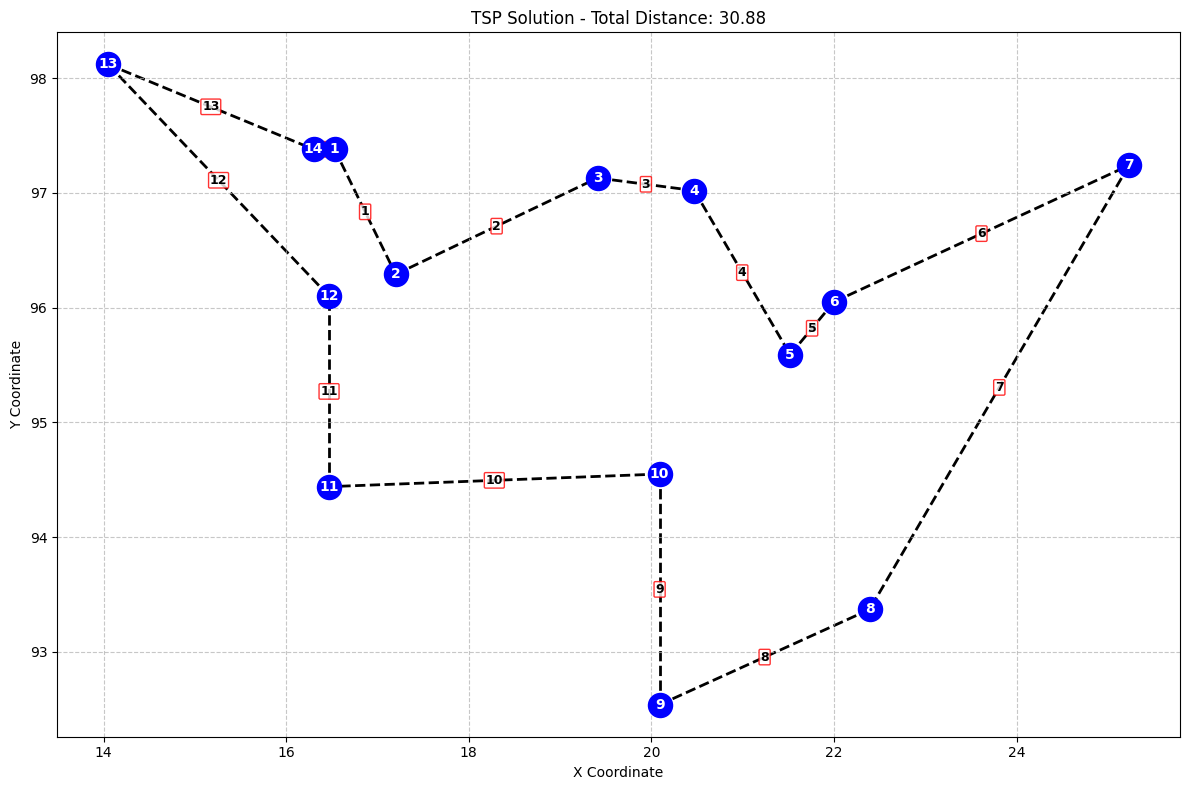

In [ ]:
def plot_tsp_solution(distance, order):
    plt.figure(figsize=(12, 8))
    
    order_x = [city[1] for city in order]
    order_y = [city[2] for city in order]
    order_x.append(order[0][1])
    order_y.append(order[0][2])

    colors = plt.cm.jet(np.linspace(0, 1, len(order_x)-1))
    
    # Roads
    for i in range(len(order_x)-1):
        plt.plot([order_x[i], order_x[i+1]], 
                 [order_y[i], order_y[i+1]], 
                 '--', 
                 color="black", 
                 linewidth=2,
                 zorder=1)
        mid_x = (order_x[i] + order_x[i+1]) / 2
        mid_y = (order_y[i] + order_y[i+1]) / 2
        
        plt.annotate(f"{i+1}", 
                    (mid_x, mid_y),
                    color='black',
                    fontsize=9,
                    fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.1", fc="white", alpha=0.8, color = "red"),
                    ha='center', 
                    va='center',
                    zorder=2)
    
    # Cities
    for i, city in enumerate(order):
        plt.scatter(city[1], city[2], c='blue', s=300, zorder=3)
        plt.annotate(f"{i+1}", (city[1], city[2]), 
                    color='white',
                    fontsize=10,
                    fontweight='bold',
                    ha='center', 
                    va='center',
                    zorder=4)
    
    plt.title('TSP Solution - Total Distance: {:.2f}'.format(distance))
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

saPath = load_file("burma14.tsp")
calculate_distance, order = calculate_distance_annealing(saPath)
plot_tsp_solution(calculate_distance, order)